# Adult Dataset

## 一. <a href='#資料介紹'>資料介紹</a>
1994年人口普查數據（美國），居民年收入是否超過50,000的分類問題。
1. 來源
2. 資料介紹
3. 欄位

## 二. <a href='#呈現'>呈現</a>
1. <a href='#1.-Load-Libraries'>Load Libraries</a>
2. <a href='#2.-Load-Data'>Load Data</a>
3. <a href='#3.-Missing-Value'>Missing Value</a>
4. <a href='#4.-Analyze-Data'>Analyze Data</a>
5. <a href='#5.-Baseline'>Baseline</a>
6. <a href='#6.-Feature-Engineering-&-Modeling'>Feature Engineering & Modeling</a>
7. <a href='#7.-Add-New-Feature'>Add New Feature</a>
8. <a href='#8.-Conclusion'>Conclusion</a>


---

## 資料介紹

### 1.來源
使用[UCI機器學習](https://archive.ics.uci.edu/ml/index.php)的[成人普查收入資料集](https://archive.ics.uci.edu/ml/datasets/Adult)


### 2.資料介紹
這是一個成人普查收入的資料集（美國），時間為1994年8月，目標是預測某人的年收入是否在50,000美元以下

### 3.欄位

Shape：(32561, 15)


```
數值型：['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week', 'income']

類別型：['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
```

中文欄位|英文欄位|值
:---|:---|:---
年齡|Age|continuous
序號|Fnlwgt|continuous
教育程度|Education|大學，高中，碩士，博士...等
受教育時間|Education-num|continuous
職業|Occupation|科技業，銷售，教授，行政助理，農業，漁業，運輸，軍人...等
工作類型|Workclass|私人，自主經營，非政府，地方政府，州政府，無薪，從未工作...等
婚姻狀況|Marital-status|已婚，離婚，未婚，喪偶...等
親屬|Relationship|妻子，獨生子女，丈夫...等
種族|Race|白人，亞洲人，印度人，黑人...等
性別|Sex|男，女
資本收益|Capital-gain|continuous
資本損失|Capital-loss|continuous
每周工作時數|Hours-per-week|continuous
國籍|Native-country|美國，柬埔寨，英國，加拿大，德國，印度，日本，義大利，菲律賓，中國，台灣...等
收入|Income|>50K, <=50K

<a href='#Adult-Dataset'>Back To Top</a>

---

## 呈現

## 1. Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split 
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.float_format',lambda x : '%.2f' % x)

sns.set()

<a href='#Adult-Dataset'>Back To Top</a>

---

## 2. Load Data

In [3]:
dataset = pd.read_csv("../input/adult.csv")

### 資料筆數：(32561, 15)

In [4]:
dataset.shape

(32561, 15)

### 發現有些資料是問號 -> missing value

後面處理missing value

In [5]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [7]:
## 查看各個欄位的資料類型
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

<a href='#Adult-Dataset'>Back To Top</a>

---

In [37]:
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44,0.24
std,13.64,105549.98,2.57,7385.29,402.96,12.35,0.43
min,17.00,12285.00,1.00,0.00,0.00,1.00,0.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00,0.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00,0.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00,0.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00,1.00


In [20]:
dataset["workclass"].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [35]:
non_workclass = dataset[dataset["workclass"]=='?']
age_65 = non_workclass[non_workclass['age']>=65]

In [36]:
age_65[age_65['income']>0]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
114,72,?,118902,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,2392,6,United-States,1
133,65,?,240857,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,2377,40,United-States,1
136,68,?,257269,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,2377,35,United-States,1
230,66,?,177351,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,2174,40,United-States,1
987,66,?,213149,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,1825,40,United-States,1
1613,69,?,323016,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,99999,0,40,United-States,1
1730,75,?,111177,Bachelors,13,Widowed,?,Not-in-family,White,Female,25124,0,16,United-States,1
1732,65,?,224472,Prof-school,15,Never-married,?,Not-in-family,White,Male,25124,0,80,United-States,1
1745,68,?,146645,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,20051,0,50,United-States,1
1750,67,?,129188,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,20051,0,5,United-States,1


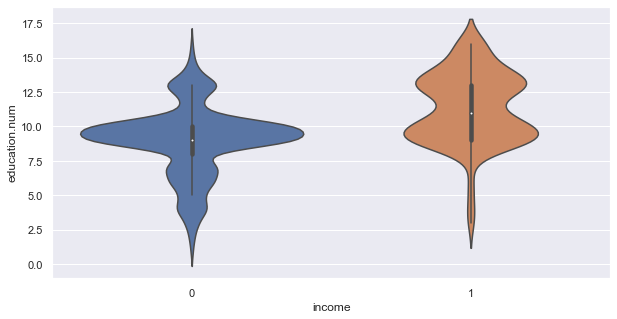

In [30]:
plt.figure(figsize=(10,5)) 
sns.violinplot(y='education.num',x='income',data=non_workclass)

## 3. Missing Value
- 把問號取代成Nan，看資料裡有多少missing value
    - occupation	1843
    - workclass	1836
    - native.country	583
- 把缺的值都填入眾數(mode)

In [7]:
for col in dataset.columns:
    dataset[col] = dataset[col].replace('?', np.nan)

In [8]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [9]:
def na_check(df):
    missing_data = pd.DataFrame(dataset.isnull().sum(), columns=['missing'])
    missing_data = missing_data.sort_values(ascending=False, by=['missing'])
    display(missing_data)
na_check(dataset)

,missing
occupation,1843
workclass,1836
native.country,583
age,0
fnlwgt,0
education,0
education.num,0
marital.status,0
relationship,0
race,0


### Missing Value 填補方式
1. workclass：有看過資料workclass為缺失值的hours.per.week都>0，所以並非無業，所以填入workclass的眾數
2. occupation：也是填入眾數
3. native.country：因為這個資料是在調查美國人，所以將缺失值填入眾數:美國

In [27]:
dataset["workclass"].mode()[0]

'Private'

In [28]:
dataset["occupation"].mode()[0]

'Prof-specialty'

In [29]:
dataset["native.country"].mode()[0]

'United-States'

In [30]:
dataset["workclass"] = dataset["workclass"].fillna(dataset["workclass"].mode()[0])
dataset["occupation"] = dataset["occupation"].fillna(dataset["occupation"].mode()[0])
dataset["native.country"] = dataset["native.country"].fillna(dataset["native.country"].mode()[0])

### Countplot
1. workclass 
2. occupation 
3. native.country

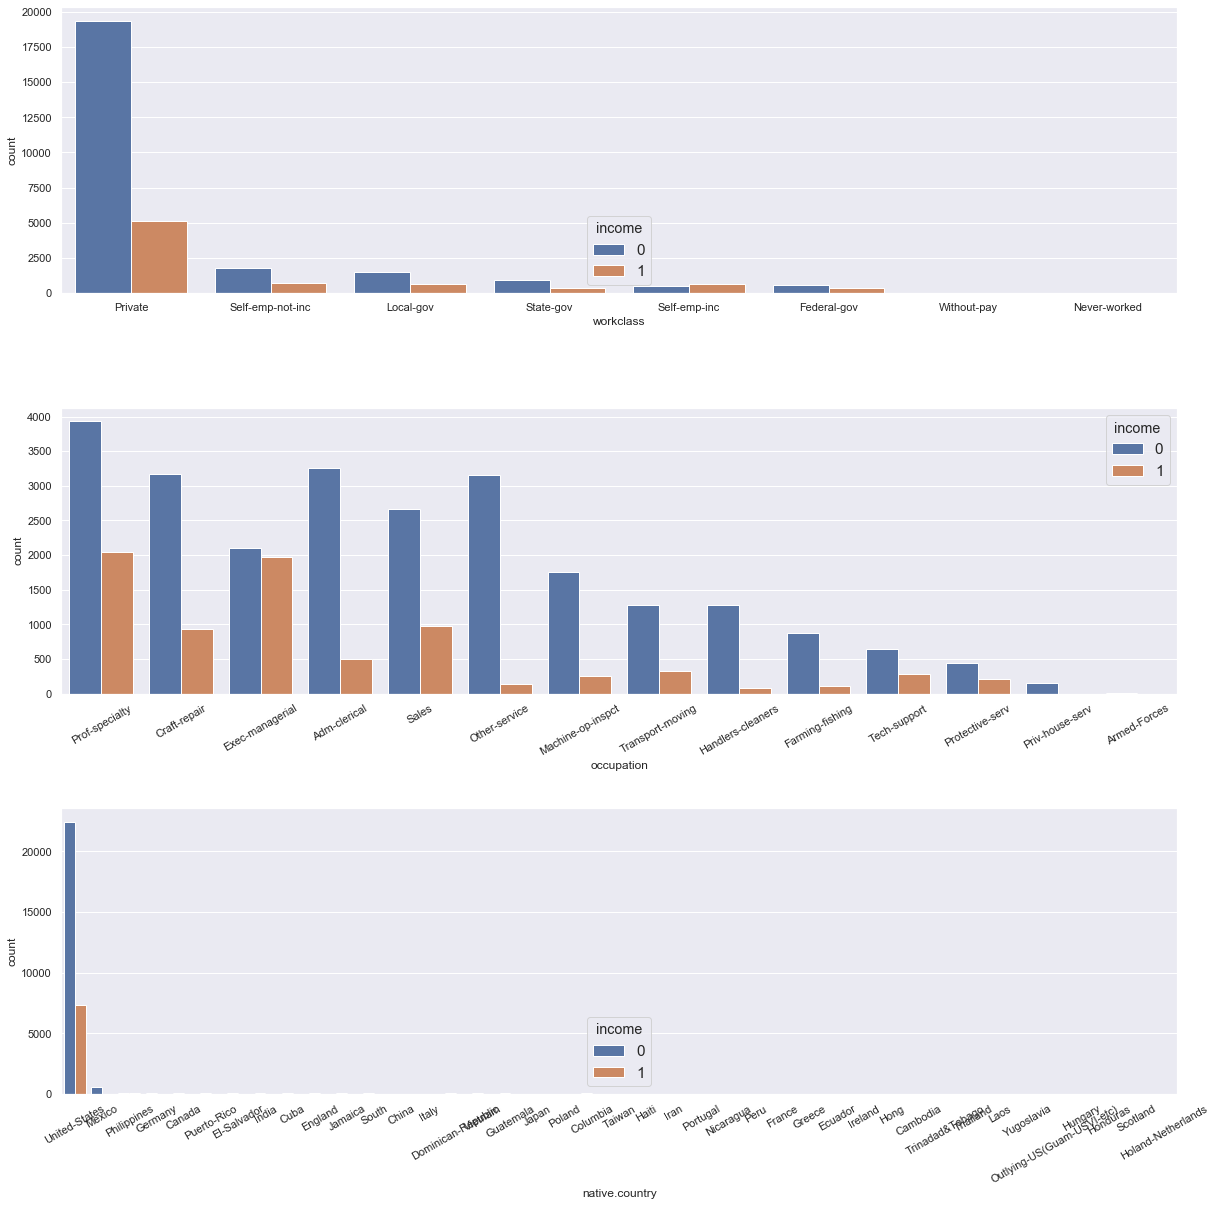

In [32]:
fig, (a,b,c) = plt.subplots(3,1,figsize=(20,20))
plt.subplots_adjust(wspace =0, hspace =0.4)
cat_features = ['workclass', 'occupation','native.country']
ax_ = [a, b, c]

for col, ax in zip(cat_features, ax_):
    sns.set(font_scale =1.4)
    sns.countplot(dataset[col],hue=dataset['income'],ax=ax, order=dataset[col].value_counts().index)
    if len(dataset[col].unique())>10:
        ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

### 從上圖可以看出native.country的分類太多，因此改成兩種分類，美國人/非美國人

In [33]:
dataset.loc[dataset['native.country']!='United-States','native.country'] = 'non_usa'

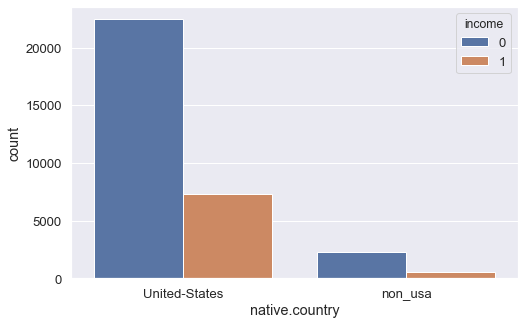

In [34]:
sns.set(font_scale =1.2)
plt.figure(figsize=(8,5)) 

sns.countplot(dataset['native.country'],hue=dataset['income'])

<a href='#Adult-Dataset'>Back To Top</a>

---

## 4. Analyze Data
### 4.1 Numeric

1. age：年紀最小是17歲，最大是90歲平均是38歲
2. fnlwgt：代表最終權重，因此不包括在分析中
3. education.num：教育程度
4. capital.gain：資本利得，EX.買股票賺的錢，大部分資料為0，少數人有投資
5. capital.loss：資本損失
6. hours.per.week：每週工作時數平均是40小時

In [35]:
# Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week', 'income']

# Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

In [36]:
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44,0.24
std,13.64,105549.98,2.57,7385.29,402.96,12.35,0.43
min,17.00,12285.00,1.00,0.00,0.00,1.00,0.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00,0.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00,0.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00,0.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00,1.00


### 收入>50k的比例
從這張圖可以看出收入>50k的人大概佔資料中的1/4

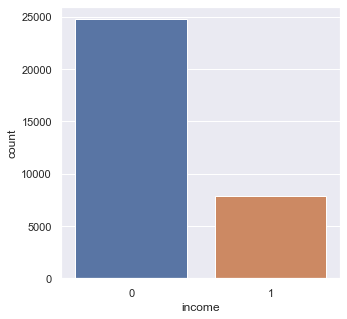

In [37]:
sns.set(font_scale =1)
plt.figure(figsize=(5,5)) 
sns.countplot(dataset['income'],label="Count")

### 相關係數
這張圖可以看出numeric features跟income的相關係數
最高的前三名分別為

rank|features|correlation
:---:|:---:|:---:
1|education.num|0.34
2|age|0.23
3|hours.per.week|0.23

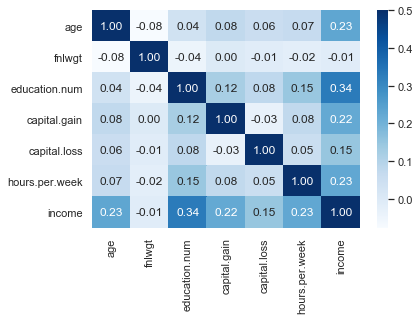

In [38]:
# Correlation matrix between numerical values
g = sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "Blues", vmax=0.5)

### KDE plot（核密度估計圖）
1. 可以看出age大部分集中在20-40歲
2. 大部分的受教育時間大概是高中到大學
3. capital gain大約都在20,000以下，有些會到100,000
4. capital loss大約在2,000左右
5. 每週工時集中在40小時

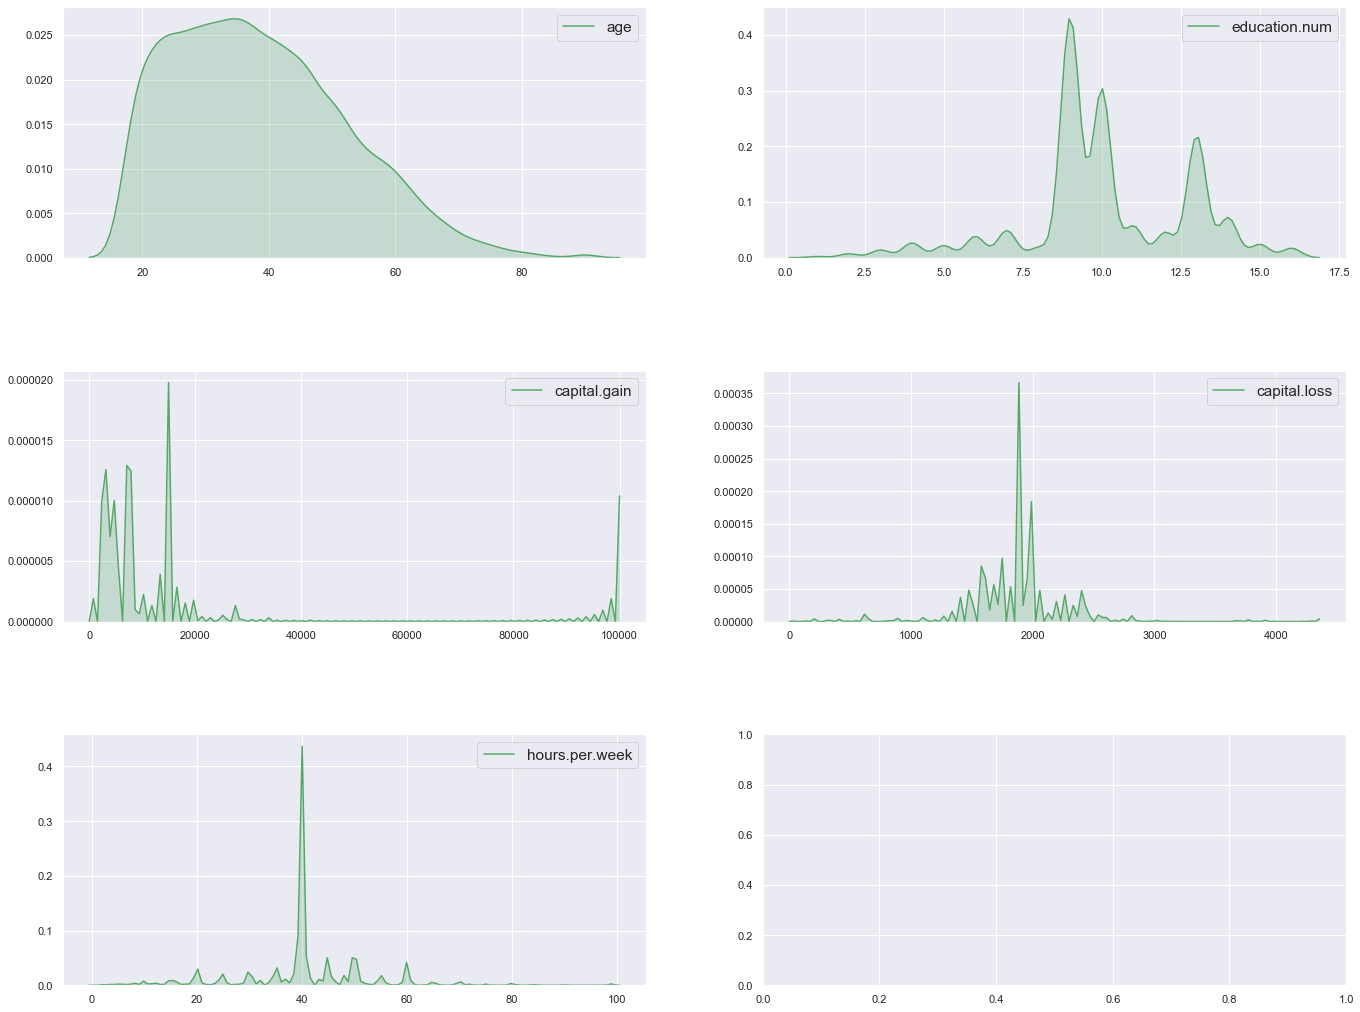

In [39]:
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(23,18))
plt.subplots_adjust(wspace =0.2, hspace =0.45)
num_features =  ['age','education.num','capital.gain','capital.loss','hours.per.week']

ax_ = [a, b, c, d, e, f]

for col, ax in zip(num_features, ax_):
    sns.set(font_scale =1.4)
    sns.kdeplot(dataset[col],ax=ax, shade=True,color="g")


education|對應名稱|education.num
:---:|:---:|:---:
Preschool|幼稚園| 1
1st-4th|小學1-4年級|2
5th-6th|小學5、6年級|3
7th-8th|國中一、二年級|4
9th|國三|5
10th|高一|6
11th|高二|7
12th|高三|8
HS-grad|高中畢業|9
Some-college|大學未畢業|10
Assoc-voc|準職業學位|11
Assoc-acdm|大學專科|12
Bachelors|學士|13
Masters|碩士|14
Prof-school|職業學校|15
Doctorate|博士|16



### Education.num 可以看出受教育時間越長，收入越有可能>50K

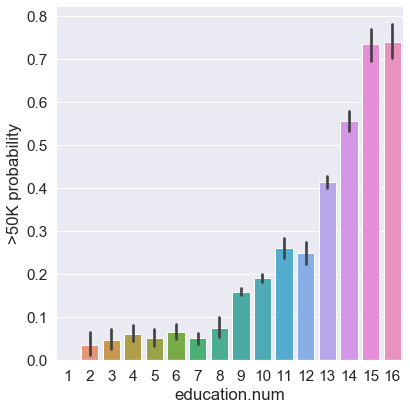

In [40]:
g = sns.catplot(x="education.num",y="income",data=dataset,kind="bar",height = 6)
g.despine(left=True)
g = g.set_ylabels(">50K probability")

### age
age可以看出年收入>50K的年紀比較大（集中在40歲左右），年收入<50K（集中在25歲左右）

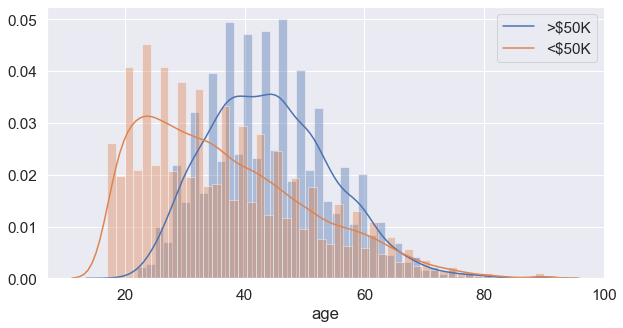

In [41]:
fig = plt.figure(figsize=(10,5)) 
sns.distplot(dataset.loc[dataset['income'] == 1]['age'], kde_kws={"label": ">$50K"})
sns.distplot(dataset.loc[dataset['income'] == 0]['age'], kde_kws={"label": "<$50K"})

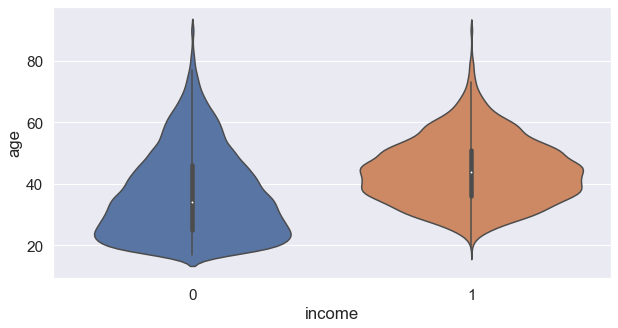

In [42]:
plt.figure(figsize=(10,5)) 
sns.violinplot(y='age',x='income',data=dataset)

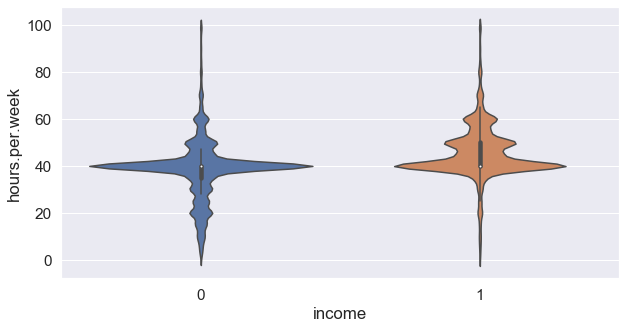

In [43]:
plt.figure(figsize=(10,5)) 
sns.violinplot(y='hours.per.week',x='income',data=dataset)

## 結論
1. 資料中有1/4的人年收入大於50K
2. 年收入的相關係數最高前三名為
    1. education.num：0.34
    2.  age：0.23
    3.  hours.per.week：0.23


3. education.num可以看出教育程度越高，年收入>50K的機率越高
4. 可以明顯看出收入>50K的年齡大於收入<50K
5. hours.per.week可以看出年收入>50K每週平均工時比較高

<a href='#Adult-Dataset'>Back To Top</a>

---

### 4.2 Categorical
1. workclass：有9種，最多的為私人經營
2. education：有1-16，最多為HS-grad，指學位名稱跟education.num有同樣的意思，會刪除其中一個
3. marital.status
4. occupation	
5. relationship	
6. race：種族，多為白人
7. sex：男女，男性資料較多
8. native.country：多為美國人
9. income

In [71]:
dataset.describe(include='O')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,10501,14976,5983,13193,27816,21790,29753


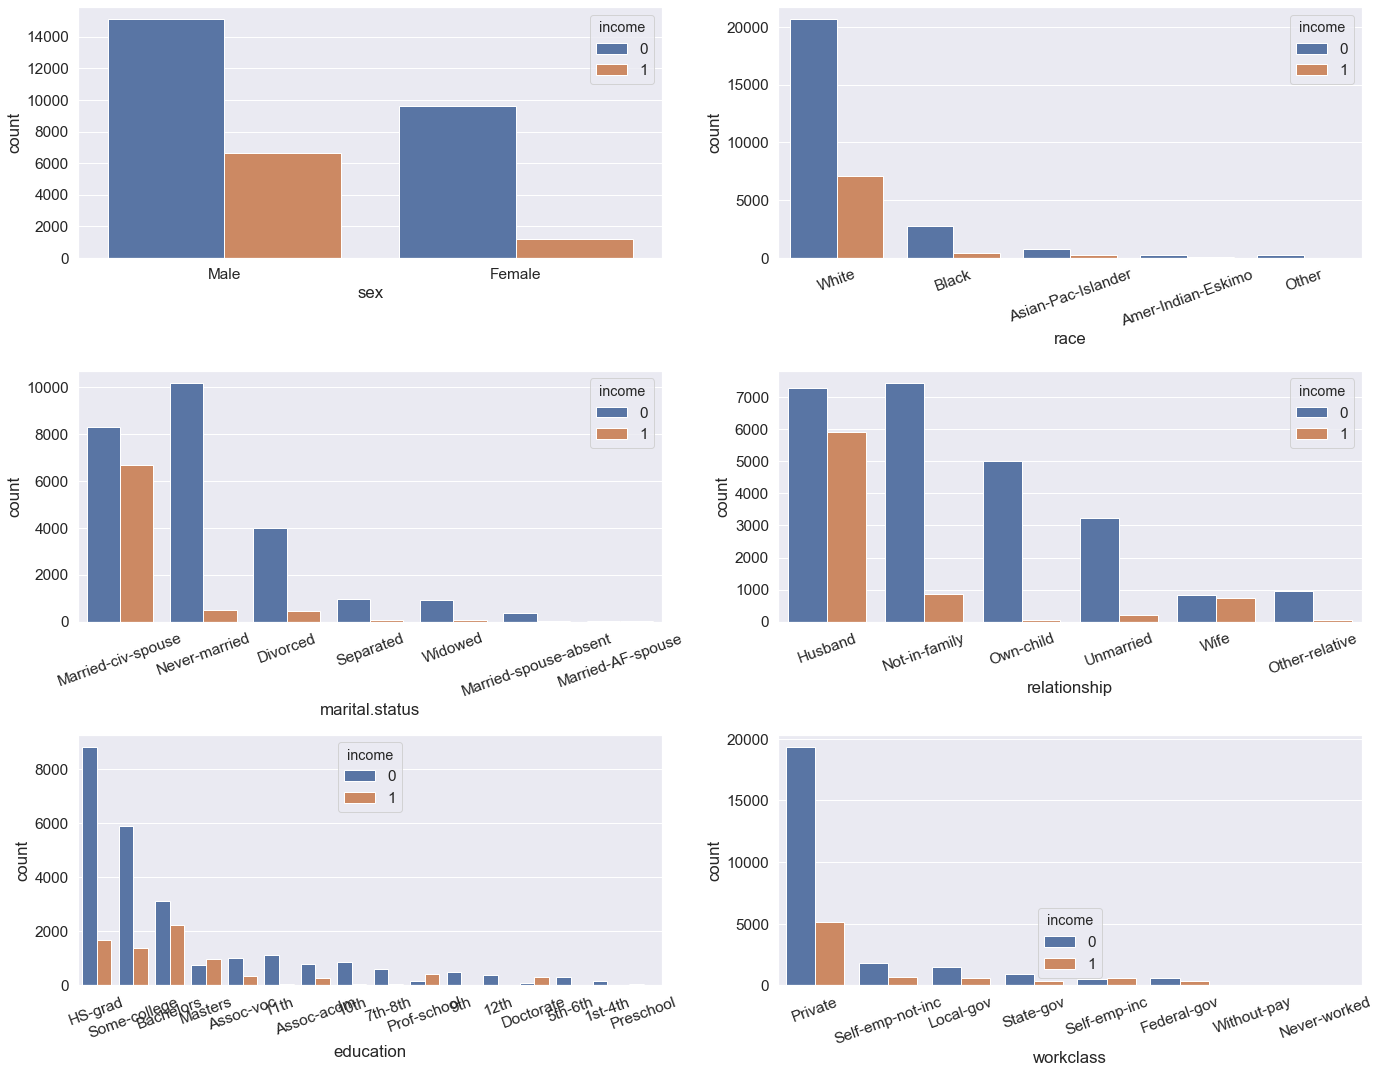

In [72]:
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(23,18))
plt.subplots_adjust(wspace =0.2, hspace =0.45)
cat_features = ['sex', 'race' , 'marital.status','relationship','education','workclass']
ax_ = [a, b, c, d, e, f]

for col, ax in zip(cat_features, ax_):
    sns.set(font_scale =1.4)
    sns.countplot(dataset[col],hue=dataset['income'],ax=ax, order=dataset[col].value_counts().index)
    if len(dataset[col].unique())>4:
        ax.set_xticklabels(ax.get_xticklabels(),rotation=20)

## 結論
1. 收入大於50K：男生大幅多於女生
2. 收入大於50K：幾乎都是白人
3. marital.status的分類可以再精簡成兩類 Single/non Single
4. relationship跟marital.status相似，會捨棄掉一個避免共線性
5. education跟education.num也存在共線性，也會捨棄掉其中一個
6. 學歷越高收入大於50K的機率較高
7. 在聯邦政府或私營部門工作收入大於50K的機率較高

<a href='#Adult-Dataset'>Back To Top</a>

## 5. Baseline

全部的feature都丟進去

In [73]:
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [74]:
baseline_dataset = dataset.copy()
le = LabelEncoder()
for col in baseline_dataset:
    if baseline_dataset.dtypes[col]==np.object:
         baseline_dataset[col]=le.fit_transform(baseline_dataset[col])

In [75]:
X = baseline_dataset.drop(['income'], axis=1)
y = baseline_dataset['income']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [77]:
rfc = RandomForestClassifier(max_depth = 3, n_estimators =5 )
rfc.fit(X_train, y_train)
scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.82988741 0.81981982 0.80937756 0.81981982 0.83104649]
0.821990219454438


<a href='#Adult-Dataset'>Back To Top</a>

---

## 6. Feature Engineering & Modeling

1. marital.status：改為兩種分類 Single/Married
2. workclass
3. education.num
4. race
5. sex
6. relationship
7. capital.gain
8. capital.loss

In [78]:
dataset["marital.status"] = dataset["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
dataset["marital.status"] = dataset["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
dataset["marital.status"] = dataset["marital.status"].map({"Married":1, "Single":0})
dataset["marital.status"] = dataset["marital.status"].astype(int)

In [79]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,0,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,0,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,0,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,0,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,0,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [80]:
Feature_dataset = dataset.copy()
le = LabelEncoder()
for col in dataset:
    if Feature_dataset.dtypes[col]==np.object:
         Feature_dataset[col]=le.fit_transform(Feature_dataset[col])

In [81]:
X = Feature_dataset[['workclass', 'education.num', 'marital.status', 'race', 'sex', 'relationship', 'capital.gain', 'capital.loss']]
y = Feature_dataset['income']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [83]:
rfc = RandomForestClassifier(max_depth = 3, n_estimators =5 )
rfc.fit(X_train, y_train)
scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.83643808 0.83005733 0.83374283 0.84336609 0.80339955]
0.8294007764731252


<a href='#Adult-Dataset'>Back To Top</a>

---

## 7. Add New Feature


1. age_hours = age * hours.per.week
2. marital.status
2. workclass
3. education.num
4. race
5. sex
6. relationship
7. capital.gain
8. capital.loss

In [84]:
# Feature Crossing: Age * Hours Per Week
dataset['age_hours'] = dataset['age'] * dataset['hours.per.week']

In [85]:
Feature_dataset = dataset.copy()
le = LabelEncoder()
for col in dataset:
    if Feature_dataset.dtypes[col]==np.object:
         Feature_dataset[col]=le.fit_transform(Feature_dataset[col])

In [86]:
X = Feature_dataset[['workclass', 'education.num', 'marital.status', 'race', 'sex', 'relationship', 'capital.gain', 'capital.loss', 'age_hours']]
y = Feature_dataset['income']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [88]:
rfc = RandomForestClassifier(max_depth = 3, n_estimators =5 )
rfc.fit(X_train, y_train)
scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.8370522  0.8454136  0.84172809 0.84643735 0.8308417 ]
0.8402945859744089


In [89]:
# Extract single tree
estimator_limited = rfc.estimators_[0]
file = 'tree_add_new_feature'
from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file=f'../output/{file}.dot', feature_names = X.columns,
                class_names = [str(i) for i in y_test.unique()],
                rounded = True, proportion = False, precision = 2, filled = True)

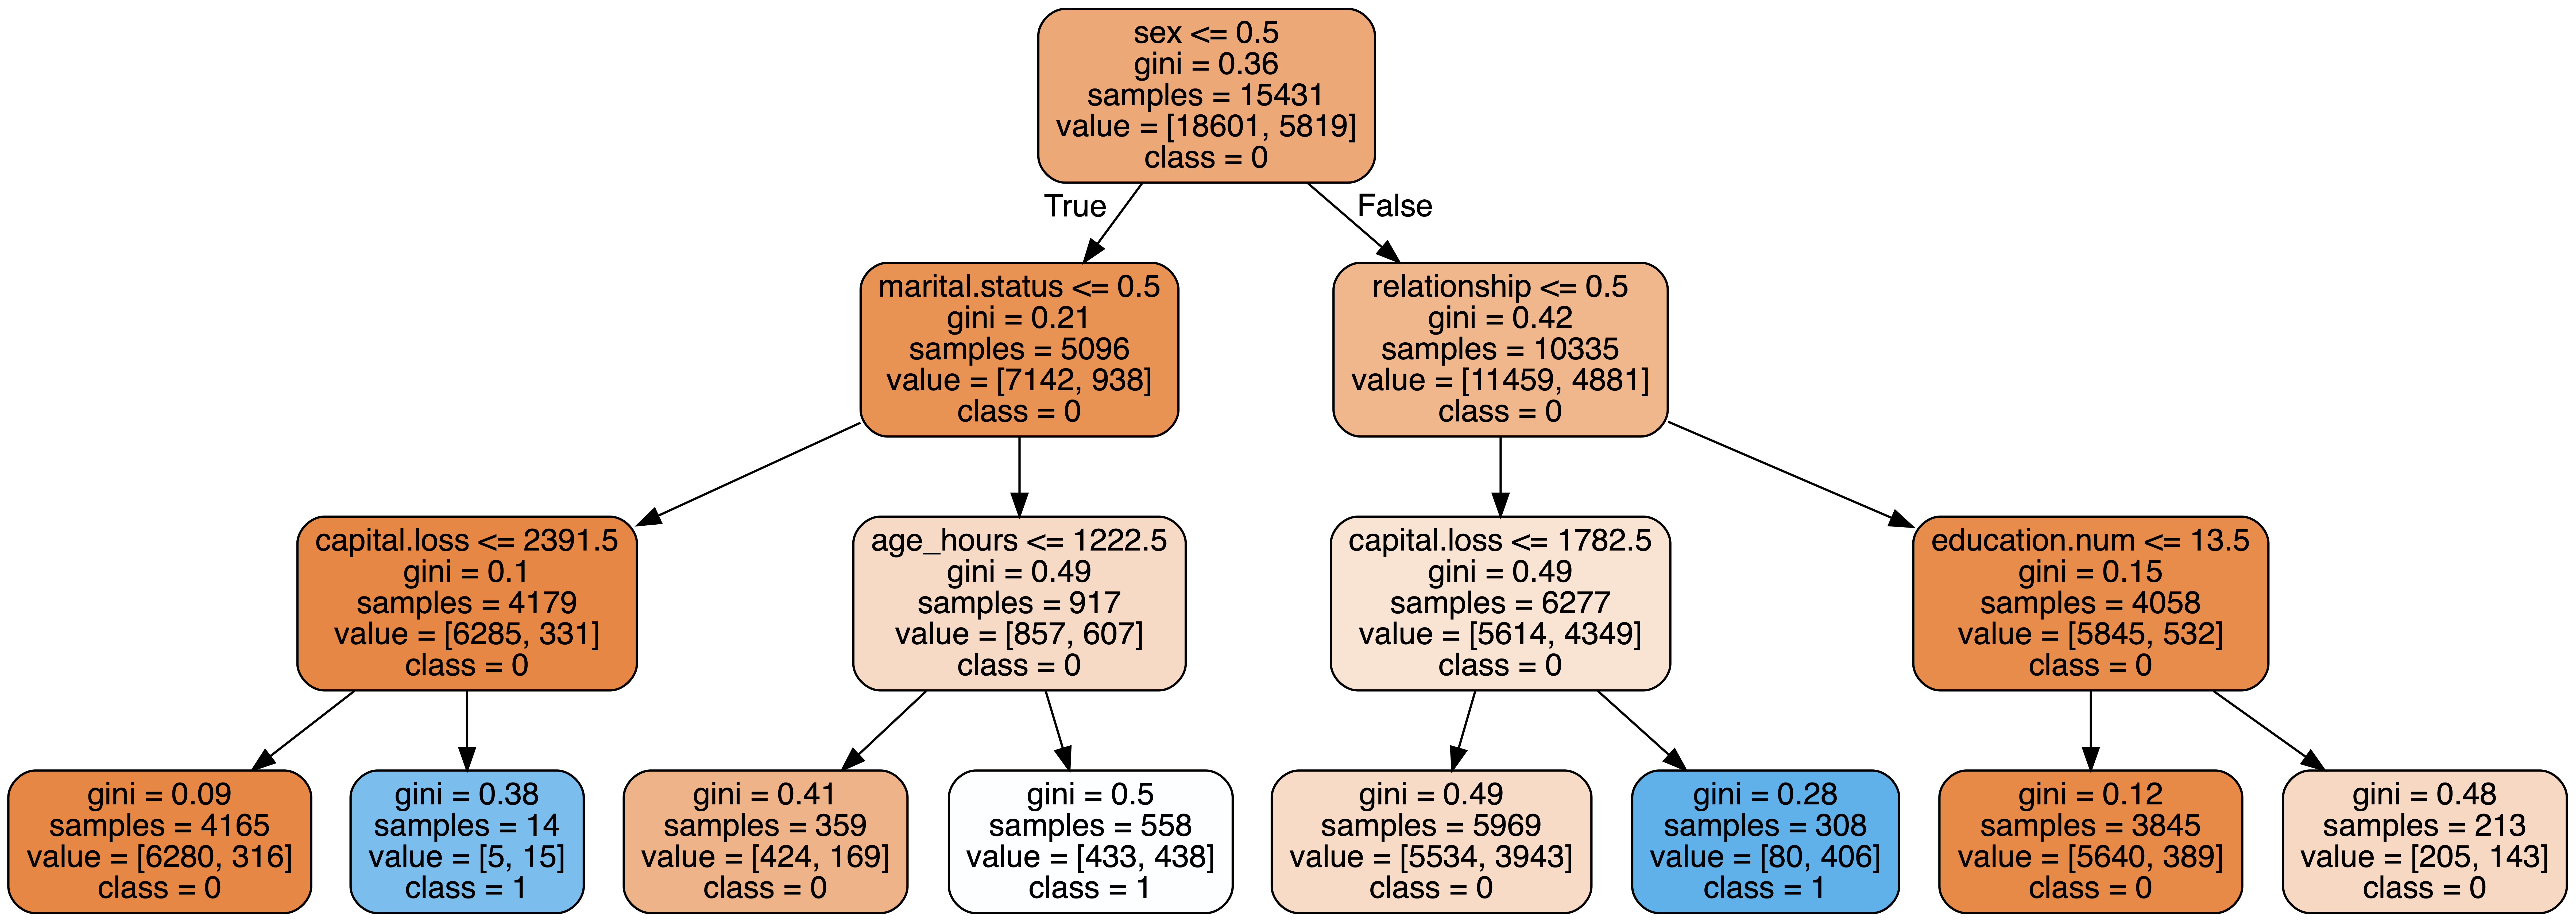

In [90]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', f'../output/{file}.dot', '-o', f'../output/{file}.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = f'../output/{file}.png')

<a href='#Adult-Dataset'>Back To Top</a>

## 8. Conclusion

由上面的決策樹圖可以看出
1. 男性，單身，有較大量的投資
2. 男性，已婚，每週工時 x 年紀 較高者
3. 女性，單身，有較大量的投資

-> 這三種人有較大的機率年收入大於50,000